In [66]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd

# Set path to figure folder
fig_path = os.getcwd() + '/Figures'
print('Figure path:', fig_path)
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

Figure path: c:\Users\User\OneDrive\Documentos\Teaching\PolEcon-Oxford2025\03 Simulations\Week2/Figures


In [67]:
x_L, y_L = 0.2, 1.0
x_R, y_R = 1.0, 0.3

# Utility function
def utility(x, y, x_i, y_i):
    return -((x - x_i) ** 2 + (y - y_i) ** 2)

# Recalculate baseline utilities (still majority rule outcome is median)
x_median, y_median = 0.5, 0.5
U_L_baseline = utility(x_median, y_median, x_L, y_L)
U_R_baseline = utility(x_median, y_median, x_R, y_R)

# Grid search for possible logroll proposals
x_vals = np.linspace(0.0, 1.0, 201)
y_vals = np.linspace(0.0, 1.0, 201)

# Re-run grid search
results = []
for x in x_vals:
    for y in y_vals:
        u_L = utility(x, y, x_L, y_L)
        u_R = utility(x, y, x_R, y_R)
        if u_L > U_L_baseline and u_R > U_R_baseline:
            results.append((x, y, u_L, u_R))

# Convert and sort
df = pd.DataFrame(results, columns=["x", "y", "U_L", "U_R"])
df["total_gain"] = (df["U_L"] - U_L_baseline) + (df["U_R"] - U_R_baseline)
df_sorted = df.sort_values(by="total_gain", ascending=False)

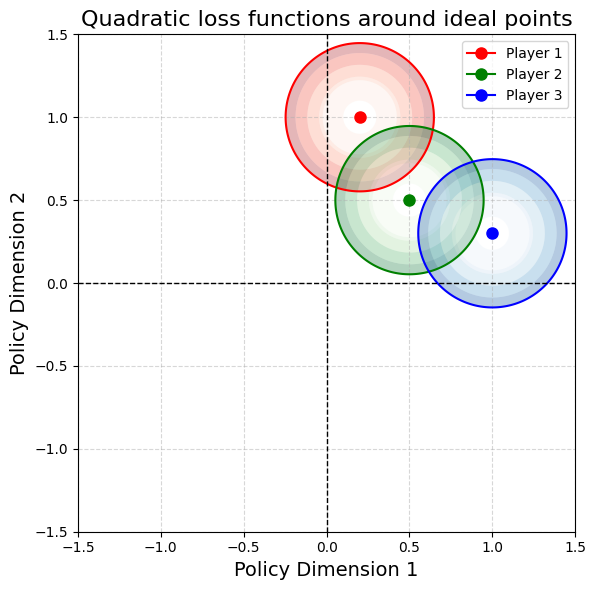

In [68]:
# Grid
x = np.linspace(-1.5, 1.5, 300)
y = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x, y)

# Loss function
def quadratic_loss(x, x_ideal, y, y_ideal):
    return (x - x_ideal)**2 + (y - y_ideal)**2

# Players
ideal_points = [(0.2, 1), (0.5, 0.5), (1, 0.3)]
cmap_names = ['Reds', 'Greens', 'Blues']
line_colors = ['red', 'green', 'blue']
labels = ['Player 1', 'Player 2', 'Player 3']
markers = ['o', 'o', 'o']

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop through players
for (x_id, y_id), cmap, color, label, marker in zip(ideal_points, cmap_names, line_colors, labels, markers):
    Z = quadratic_loss(X, x_id, Y, y_id)
    
    # Define only the lowest contour levels (tightest area)
    tight_levels = [0.01, 0.05, 0.06, 0.1, 0.15, 0.2]
    
    # Heatmap: use alpha for subtlety
    ax.contourf(X, Y, Z, levels=tight_levels, cmap=cmap, alpha=0.3, antialiased=True)
    
    # Contour line: outermost ring of the focus area
    ax.contour(X, Y, Z, levels=[tight_levels[-1]], colors=color, linewidths=1.5)

    # Plot ideal point
    ax.plot(x_id, y_id, marker=marker, color=color, markersize=8, label=label)

# Final styling
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axvline(x=0, linestyle='dashed', color='black', linewidth = 1)
ax.axhline(y=0, linestyle='dashed', color='black', linewidth = 1)
ax.set_xlabel('Policy Dimension 1', fontsize = 14)
ax.set_ylabel('Policy Dimension 2', fontsize = 14)
ax.set_title('Quadratic loss functions around ideal points', fontsize = 16)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='upper right')
plt.tight_layout()
# save figure with specified path and tight layout 
plt.savefig(fig_path + '/quadratic_loss_illustration.png', dpi=300, bbox_inches='tight')
plt.show()

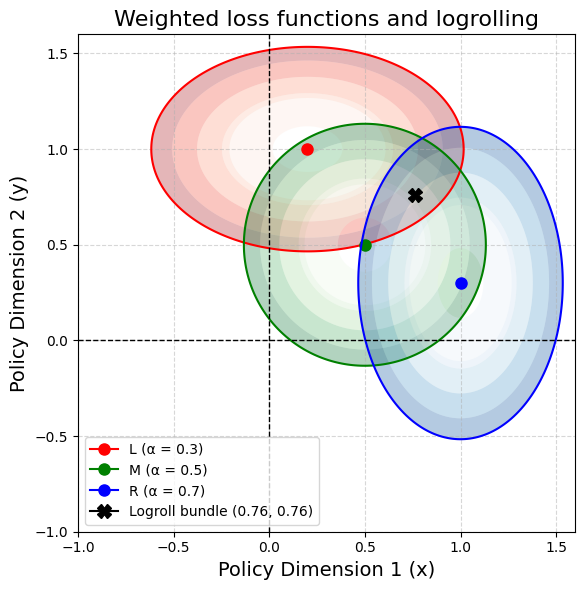

In [69]:
# Modified loss function for salience-weighted utilities
def weighted_loss(x, x_ideal, y, y_ideal, alpha):
    return alpha * (x - x_ideal)**2 + (1 - alpha) * (y - y_ideal)**2

# Redefine grid
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x, y)

# Players' salience-weighted ideal points and alphas
players = [
    {'ideal': (0.2, 1.0), 'alpha': 0.3, 'cmap': 'Reds', 'color': 'red', 'label': 'L (α = 0.3)', 'marker': 'o'},
    {'ideal': (0.5, 0.5), 'alpha': 0.5, 'cmap': 'Greens', 'color': 'green', 'label': 'M (α = 0.5)', 'marker': 'o'},
    {'ideal': (1.0, 0.3), 'alpha': 0.7, 'cmap': 'Blues', 'color': 'blue', 'label': 'R (α = 0.7)', 'marker': 'o'},
]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each player's weighted loss
for p in players:
    x_id, y_id = p['ideal']
    alpha = p['alpha']
    Z = weighted_loss(X, x_id, Y, y_id, alpha)

    # Define only the lowest contour levels (tightest area)
    tight_levels = [0.01, 0.05, 0.06, 0.1, 0.15, 0.2]

    # Heatmap: use alpha for subtlety
    ax.contourf(X, Y, Z, levels=tight_levels, cmap=p['cmap'], alpha=0.3, antialiased=True)

    # Contour line: outermost ring of the focus area
    ax.contour(X, Y, Z, levels=[tight_levels[-1]], colors=p['color'], linewidths=1.5)

    # Plot ideal point
    ax.plot(x_id, y_id, marker=p['marker'], color=p['color'], markersize=8, label=p['label'])

# Highlight logroll proposal point
x_star, y_star = 0.76, 0.76
ax.plot(x_star, y_star, marker='X', color='black', markersize=10, label='Logroll bundle (0.76, 0.76)')

# Final styling
ax.set_xlim(-1, 1.6)
ax.set_ylim(-1, 1.6)
ax.axvline(x=0, linestyle='dashed', color='black', linewidth=1)
ax.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
ax.set_xlabel('Policy Dimension 1 (x)', fontsize=14)
ax.set_ylabel('Policy Dimension 2 (y)', fontsize=14)
ax.set_title('Weighted loss functions and logrolling', fontsize=16)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig(fig_path + '/loss_salience_logrolling.png', dpi = 300, bbox_inches='tight')
plt.show()